In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# load all data

data_1 = pd.read_csv('dmart18_19.csv', header=0, infer_datetime_format=True, \
                           parse_dates=['Date'])

data_2 = pd.read_csv('dmart19_20.csv', header=0, infer_datetime_format=True, \
                           parse_dates=['Date'])


In [25]:
dmart_18_19 = data_1.drop(['Symbol', 'Series', 'Average Price'], axis=1)
dmart_19_20 = data_2.drop(['Symbol', 'Series', 'Average Price'], axis=1)
dmart = pd.concat([dmart_18_19, dmart_19_20])
dmart = dmart.reset_index(drop=True)

print(dmart.shape)
dmart.head()

(294, 12)


,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,2018-04-02,1324.80,1328.8,1393.0,1326.35,1345.00,1357.30,1129225,1.537612e+09,36911,445517,39.45
1,2018-04-03,1357.30,1336.7,1371.4,1332.65,1364.50,1364.30,543718,7.380976e+08,23488,156074,28.70
2,2018-04-04,1364.30,1369.3,1385.2,1350.00,1362.15,1359.15,682255,9.339676e+08,28497,209295,30.68
3,2018-04-05,1359.15,1377.8,1410.0,1371.30,1401.00,1401.30,1261502,1.761711e+09,43308,337620,26.76
4,2018-04-06,1401.30,1400.0,1424.0,1385.00,1417.05,1419.85,966666,1.363316e+09,32987,226933,23.48


In [4]:
dmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
Date                      294 non-null datetime64[ns]
Prev Close                294 non-null float64
Open Price                294 non-null float64
High Price                294 non-null float64
Low Price                 294 non-null float64
Last Price                294 non-null float64
Close Price               294 non-null float64
Total Traded Quantity     294 non-null int64
Turnover                  294 non-null float64
No. of Trades             294 non-null int64
Deliverable Qty           294 non-null int64
% Dly Qt to Traded Qty    294 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 27.6 KB


In [26]:
dmart.columns = ['date', 'prev_close', 'open_price', 'high_price', 'low_price', 'last_price', 'close_price', \
                  'traded_qty', 'turnover', 'trade_nos', 'del_qty', '%_del_to_trade']
dmart.head()

,date,prev_close,open_price,high_price,low_price,last_price,close_price,traded_qty,turnover,trade_nos,del_qty,%_del_to_trade
0,2018-04-02,1324.80,1328.8,1393.0,1326.35,1345.00,1357.30,1129225,1.537612e+09,36911,445517,39.45
1,2018-04-03,1357.30,1336.7,1371.4,1332.65,1364.50,1364.30,543718,7.380976e+08,23488,156074,28.70
2,2018-04-04,1364.30,1369.3,1385.2,1350.00,1362.15,1359.15,682255,9.339676e+08,28497,209295,30.68
3,2018-04-05,1359.15,1377.8,1410.0,1371.30,1401.00,1401.30,1261502,1.761711e+09,43308,337620,26.76
4,2018-04-06,1401.30,1400.0,1424.0,1385.00,1417.05,1419.85,966666,1.363316e+09,32987,226933,23.48


In [15]:
dmart.describe()

,prev_close,open_price,high_price,low_price,last_price,close_price,traded_qty,turnover,trade_nos,del_qty,%_del_to_trade
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02,2.940000e+02,294.000000,2.940000e+02,294.000000
mean,1457.402211,1461.756122,1482.316837,1439.487415,1459.313265,1460.278231,6.810934e+05,9.971580e+08,30774.265306,2.911307e+05,40.517959
std,117.744802,107.245277,104.730108,108.514929,107.202230,107.492040,9.849594e+05,1.522138e+09,22147.061495,7.102110e+05,11.014579
min,630.000000,1150.000000,1179.000000,1125.750000,1136.000000,1133.700000,9.116100e+04,1.370788e+08,1.000000,4.094800e+04,12.350000
25%,1388.837500,1390.000000,1410.875000,1366.387500,1389.862500,1390.387500,3.259060e+05,4.796640e+08,18783.000000,1.280735e+05,33.257500
50%,1474.125000,1477.475000,1494.900000,1457.500000,1475.000000,1474.875000,4.907520e+05,6.985305e+08,25693.500000,1.888365e+05,39.615000
75%,1542.612500,1539.675000,1560.600000,1522.000000,1539.175000,1542.612500,7.345662e+05,1.055458e+09,35369.750000,2.891220e+05,47.130000
max,1669.700000,1685.100000,1698.700000,1643.350000,1681.200000,1669.700000,1.499308e+07,2.354788e+10,193038.000000,1.180014e+07,100.000000


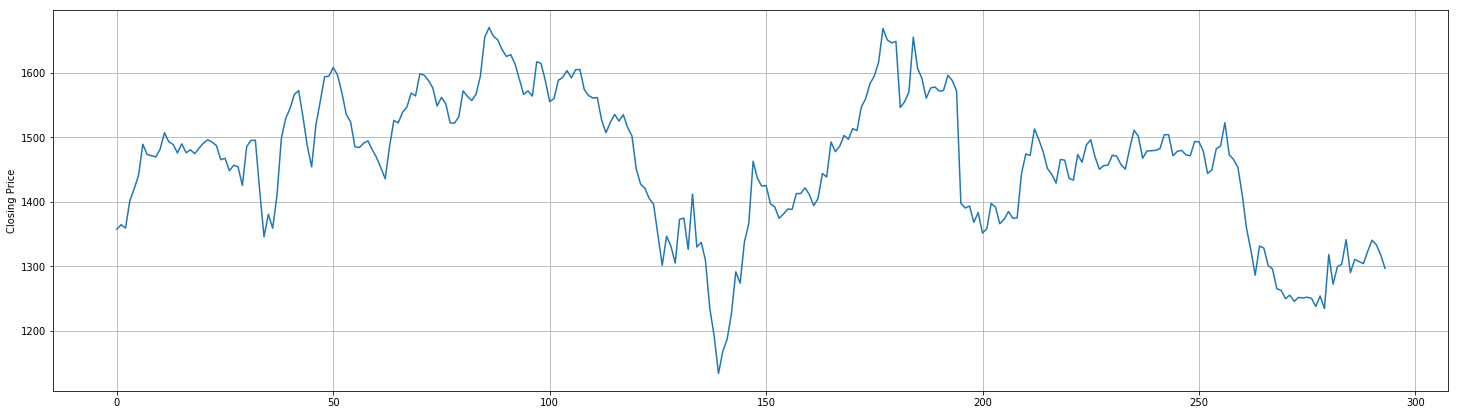

In [14]:
plt.figure(figsize=(25, 7))
plt.plot(dmart['close_price'])
#plt.plot(dmart['open_price'])
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

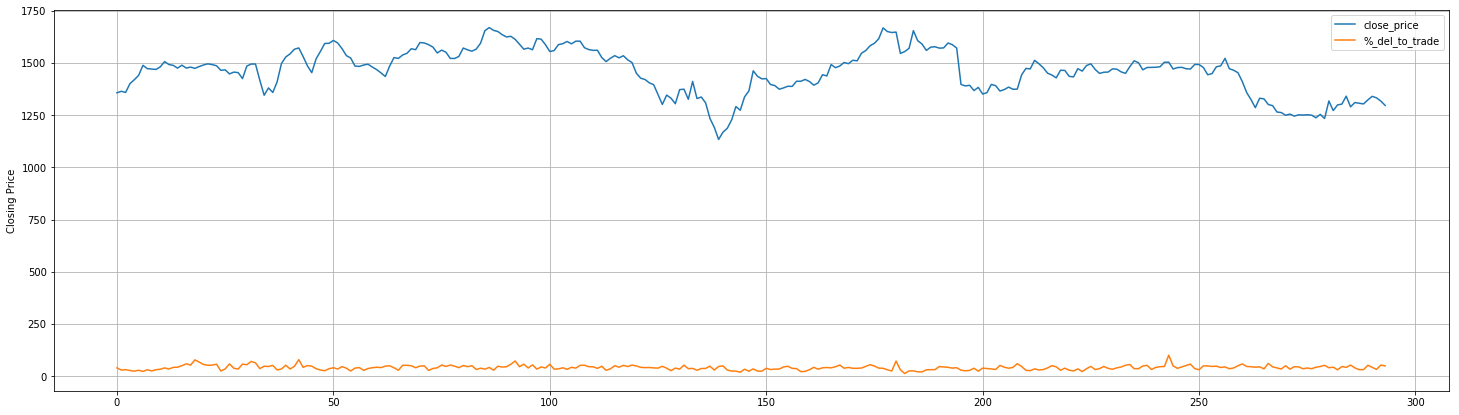

In [15]:
plt.figure(figsize=(25, 7))
plt.plot(dmart['close_price'], label = 'close_price')
#plt.plot(dmart['traded_qty'])
plt.plot(dmart['%_del_to_trade'], label = '%_del_to_trade')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
from sklearn import preprocessing
dmart['close_price'] = preprocessing.scale(dmart['close_price'])
#dmart['traded_qty'] = preprocessing.scale(dmart['traded_qty'])
dmart['%_del_to_trade'] = preprocessing.scale(dmart['%_del_to_trade'])
dmart['%_del_to_trade'] = preprocessing.scale(dmart['%_del_to_trade'])

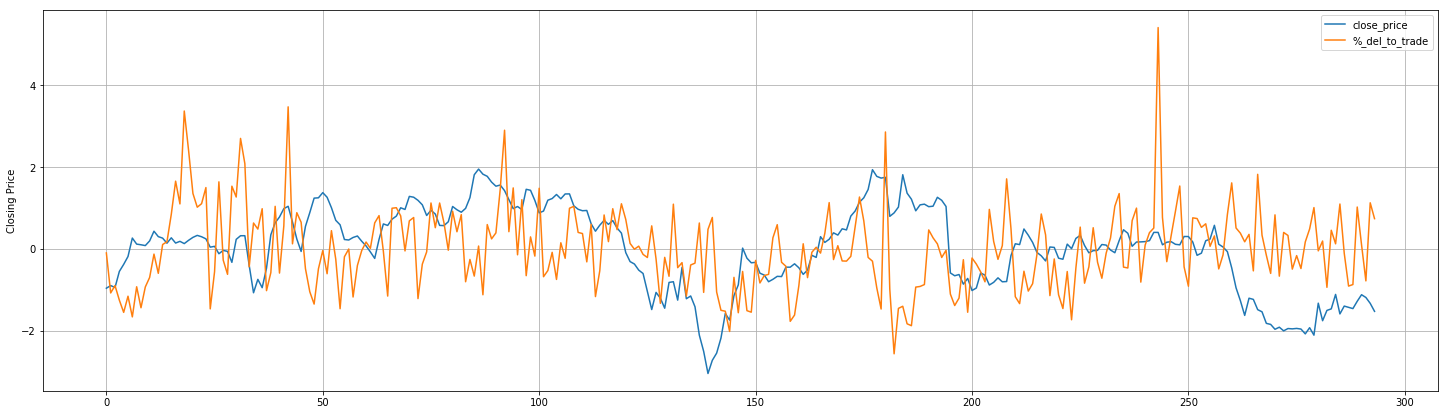

In [9]:
plt.figure(figsize=(25, 7))
plt.plot(dmart['close_price'], label = 'close_price')
#plt.plot(dmart['traded_qty'])
plt.plot(dmart['%_del_to_trade'], label = '%_del_to_trade')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
dmart['close_price']

0     -0.959641
1     -0.894409
2     -0.942401
3     -0.549611
4     -0.376746
5     -0.184311
6      0.266257
7      0.118553
8      0.102245
9      0.082209
10     0.196831
11     0.433531
12     0.301669
13     0.264393
14     0.140918
15     0.272314
16     0.144179
17     0.186114
18     0.131133
19     0.211741
20     0.283031
21     0.331489
22     0.298407
23     0.247153
24     0.044002
25     0.064037
26    -0.116749
27    -0.035675
28    -0.059438
29    -0.326890
         ...   
264   -1.203330
265   -1.232219
266   -1.482896
267   -1.535548
268   -1.817910
269   -1.843537
270   -1.962818
271   -1.912031
272   -2.001026
273   -1.944647
274   -1.952568
275   -1.941851
276   -1.957227
277   -2.075111
278   -1.924145
279   -2.106329
280   -1.324941
281   -1.753610
282   -1.501534
283   -1.464259
284   -1.111073
285   -1.587268
286   -1.395765
287   -1.427915
288   -1.457269
289   -1.278347
290   -1.118062
291   -1.185624
292   -1.329135
293   -1.524831
Name: close_price, Lengt

In [8]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


In [11]:
dmart['exp'] = exponential_smoothing(dmart['%_del_to_trade'], 0.2)

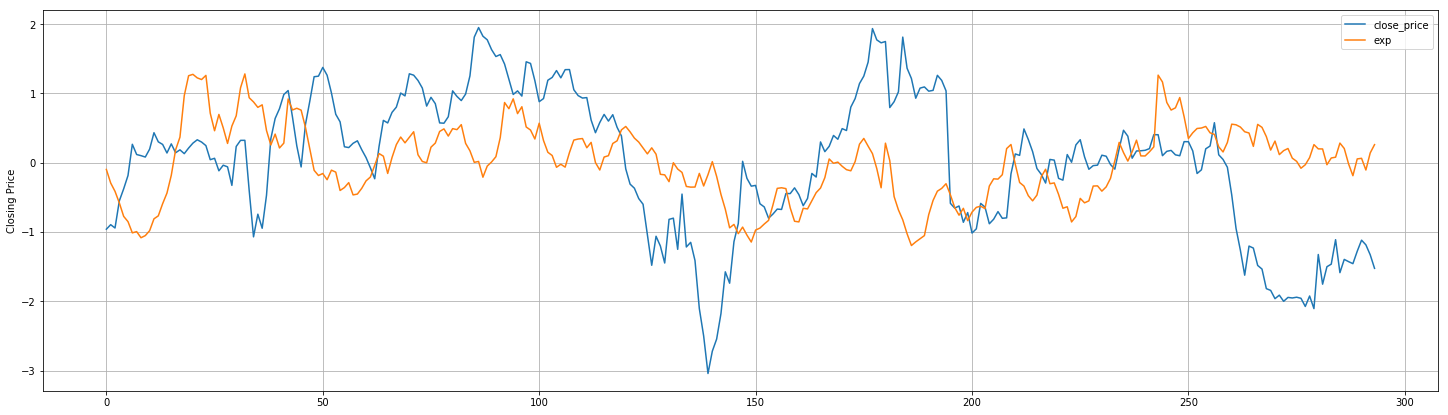

In [12]:
plt.figure(figsize=(25, 7))
plt.plot(dmart['close_price'], label = 'close_price')
#plt.plot(dmart['traded_qty'])
#plt.plot(dmart['%_del_to_trade'], label = '%_del_to_trade')
plt.plot(dmart['exp'], label = 'exp')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

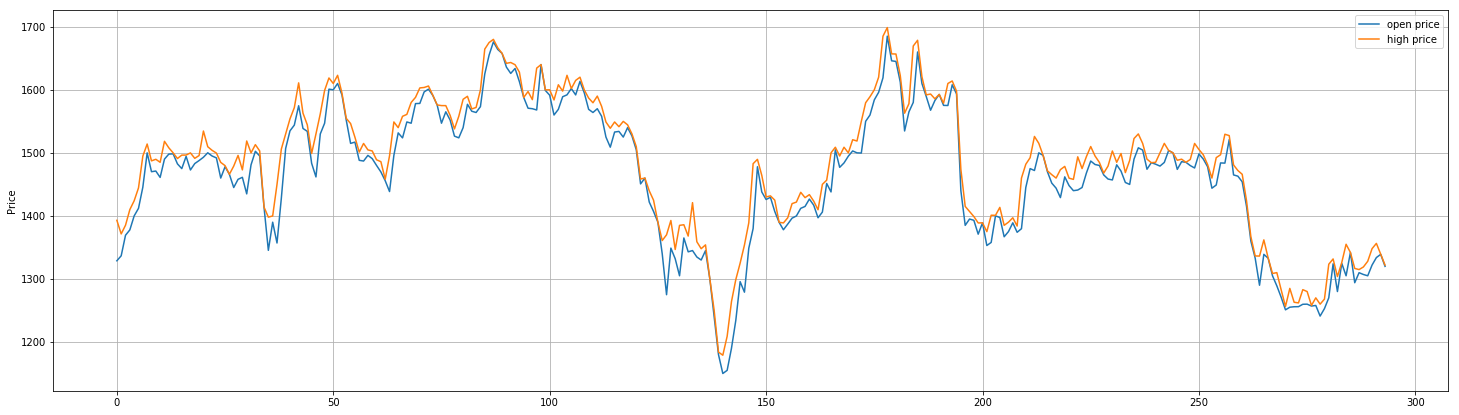

In [16]:
plt.figure(figsize=(25, 7))
#plt.plot(dmart['close_price'], label = 'close price')
plt.plot(dmart['open_price'], label = 'open price')
#plt.plot(dmart['low_price'], label = 'low price')
plt.plot(dmart['high_price'], label = 'high price')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

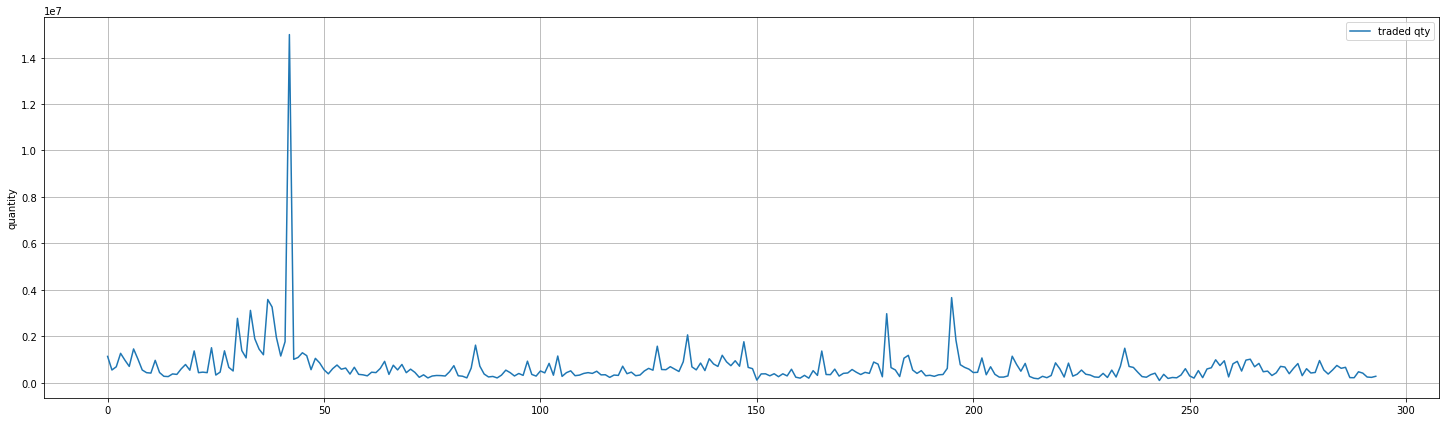

In [18]:
plt.figure(figsize=(25, 7))
plt.plot(dmart['traded_qty'], label = 'traded qty')
#plt.plot(dmart['del_qty'], label = 'del qty')

plt.ylabel('quantity')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
print("checking if any null values are present\n", dmart.isna().sum())

checking if any null values are present
 date              0
prev_close        0
open_price        0
high_price        0
low_price         0
last_price        0
close_price       0
traded_qty        0
turnover          0
trade_nos         0
del_qty           0
%_del_to_trade    0
dtype: int64


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["open_price","high_price","low_price","close_price","traded_qty"]
df_train, df_test = train_test_split(dmart, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values

min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])


Train and Test size 235 59


In [31]:
print(x_train.shape)
x_train

(235, 5)


array([[0.33414315, 0.41177602, 0.38755796, 0.41716418, 0.06852332],
       [0.34890675, 0.37021358, 0.39972952, 0.43022388, 0.02918461],
       [0.40982994, 0.39676737, 0.43324961, 0.42061567, 0.03849256],
       ...,
       [0.59998131, 0.61573985, 0.62954019, 0.60401119, 0.02892748],
       [0.5662493 , 0.55734077, 0.61678903, 0.59085821, 0.00890583],
       [0.56045599, 0.59457379, 0.62277821, 0.65018657, 0.04020637]])